In [1]:
#EDA on batting score card

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.pandas.set_option('display.max_columns',None)
bat = pd.read_csv('all_season_batting_card.csv')
bat.head(15)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,RG Sharma,Rohit Sharma,12.0,10.0,-,2.0,0.0,120.00,True,False,"{'wickets': 1, 'runs': 46}",4.4,c Curran b Chawla,<b>chipped straight to mid-off!</b> Full on of...,NaN
1,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,Q de Kock,Quinton de Kock,33.0,20.0,-,5.0,0.0,165.00,False,False,"{'wickets': 2, 'runs': 48}",5.1,c Watson b Curran,<b>straight to midwicket!</b> Slow does it! Sp...,NaN
2,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,SA Yadav,Suryakumar Yadav,17.0,16.0,-,2.0,0.0,106.25,False,False,"{'wickets': 3, 'runs': 92}",10.6,c Curran b Chahar,<b>taken at long-on!</b> Curran involved again...,NaN
3,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,SS Tiwary,Saurabh Tiwary,42.0,31.0,-,3.0,1.0,135.48,False,False,"{'wickets': 4, 'runs': 121}",14.1,c du Plessis b Jadeja,<b>taken at long-on.</b> Faf with the lob back...,NaN
4,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,HH Pandya,Hardik Pandya,14.0,10.0,-,0.0,2.0,140.00,False,False,"{'wickets': 5, 'runs': 124}",14.5,c du Plessis b Jadeja,<b>Faf you stunner!</b> Wow! What a fielder. T...,NaN
5,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,KA Pollard,Kieron Pollard,18.0,14.0,-,1.0,1.0,128.57,False,False,"{'wickets': 7, 'runs': 151}",18.1,c &dagger;Dhoni b Ngidi,<b>caught behind!</b> They've come screaming b...,NaN
6,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,KH Pandya,Krunal Pandya,3.0,3.0,-,0.0,0.0,100.00,False,False,"{'wickets': 6, 'runs': 136}",16.1,c &dagger;Dhoni b Ngidi,<b>taken down leg side!</b> Short ball cramps ...,NaN
7,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,JL Pattinson,James Pattinson,11.0,8.0,-,2.0,0.0,137.50,False,False,"{'wickets': 8, 'runs': 156}",18.5,c du Plessis b Ngidi,<b>holes out to long-on.</b> It's that slam-in...,NaN
8,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,RD Chahar,Rahul Chahar,2.0,4.0,-,0.0,0.0,50.00,False,True,{},NaN,not out,NaN,NaN
9,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,TA Boult,Trent Boult,0.0,1.0,-,0.0,0.0,0.00,False,False,"{'wickets': 9, 'runs': 156}",19.1,b Chahar,loses his leg stump. Short of good length. Wal...,NaN


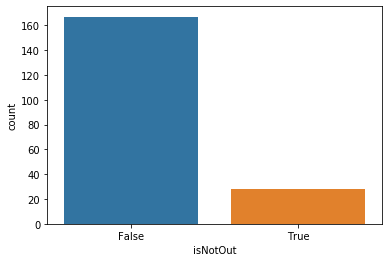

In [3]:
# given a player name :   and no of dismissal
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(bat[bat.fullName == 'Rohit Sharma'].isNotOut)
plt.show()

In [4]:
#Total Match till now(2020)
bat[bat.fullName == 'Rohit Sharma'].shape[0]

195

In [5]:
# duck outs by a player:
bat[((bat.fullName == 'Rohit Sharma')&(bat.runs == 0))].runs.shape[0]


13

In [6]:
def group_runs(x):
    if x== 0 :
        return 'Duck Out'
    elif x< 10:
        return 'Less than 10'
    elif ((x>= 10) &(x<30)):
        return '10-29'
    elif ((x>=30) &(x<50)):
        return '30-49'
    elif ((x>=50) &(x<70)):
        return 'Half Century-50-69'
    elif ((x>= 70) &(x<100)):
        return 'Half Century-70-99'
    elif x>= 100:
        return 'Century'
    else:
        return 'Injuired'

In [7]:
bat['runs_groups'] = bat.runs.apply(group_runs ) # adding a new feature for our data by creating an interval for batsmen runs

In [12]:
bat[bat.runs == bat.runs.max()] #max runs in all seasons of any player in IPL

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,runs_groups
6793,2013,598027,RCB v PWI,RCB,PWI,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,CH Gayle,Chris Gayle,175.0,66.0,102.0,13.0,17.0,265.15,False,True,{},NaN,not out,NaN,NaN,Century


In [8]:
# GIVEN A BATSMEN , SHOW CASING HIS SCORING RUNS PATTERN'S
def batsman_scoring_details(x):
    if x in bat.fullName.unique():
        print('Total innings till now:',bat[bat.fullName == x].shape[0])
        fig,ax=plt.subplots(1,2, figsize=(10,5))
        sns.countplot(x = 'runs_groups',data = bat[bat.fullName == x],
                  order = ['Duck Out','Less than 10','10-29','30-49',
                           'Half Century-50-69','Half Century-70-99','Century','Injuired'],ax = ax[0])
        ax[0].tick_params(labelrotation=90)
    #     plt.xticks(rotation = 90,ax=ax[0])

        sns.countplot(bat[bat.fullName == x].isNotOut,ax = ax[1])
        plt.show()
    else:
        print('Please search with corrdct Name from ',bat.fullName.unique())
    

Total innings till now: 182


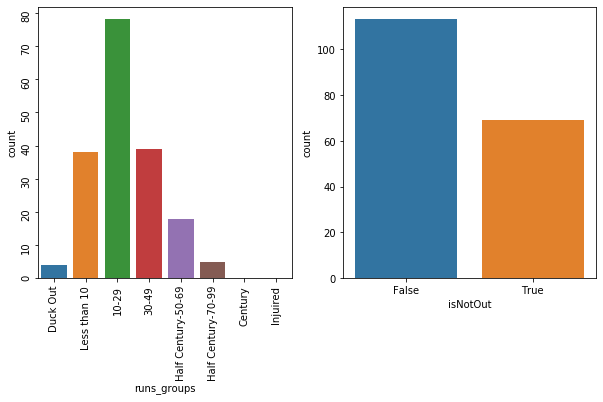

In [9]:
batsman_scoring_details('MS Dhoni')

In [19]:
# season wise franchise for player
temp = pd.pivot_table(bat,index = ['fullName','season','current_innings'],values= 'match_id',aggfunc='count')
# temp[temp.fullName == 'Rohit Sharma']
temp

match_id
fullName       season current_innings          
AB de Villiers 2008   DC                      6
               2009   DC                     13
               2010   DC                      7
               2011   RCB                    13
               2012   RCB                    13
...                                         ...
Zaheer Khan    2011   RCB                     2
               2012   RCB                     5
               2014   MI                      4
               2016   DC                      2
               2017   DC                      3

[1973 rows x 1 columns]

In [20]:
temp.index
temp.loc['Rohit Sharma']


# RS - 2008 SRH -(total )

,,match_id
season,current_innings,
2008,SRH,12
2009,SRH,16
2010,SRH,16
2011,MI,14
2012,MI,16
2013,MI,19
2014,MI,15
2015,MI,16
2016,MI,14


In [21]:
bat[bat.current_innings == 'DC']
bat[bat.season == 2020]

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,runs_groups
0,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,RG Sharma,Rohit Sharma,12.0,10.0,-,2.0,0.0,120.00,True,False,"{'wickets': 1, 'runs': 46}",4.4,c Curran b Chawla,<b>chipped straight to mid-off!</b> Full on of...,NaN,10-29
1,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,Q de Kock,Quinton de Kock,33.0,20.0,-,5.0,0.0,165.00,False,False,"{'wickets': 2, 'runs': 48}",5.1,c Watson b Curran,<b>straight to midwicket!</b> Slow does it! Sp...,NaN,30-49
2,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,SA Yadav,Suryakumar Yadav,17.0,16.0,-,2.0,0.0,106.25,False,False,"{'wickets': 3, 'runs': 92}",10.6,c Curran b Chahar,<b>taken at long-on!</b> Curran involved again...,NaN,10-29
3,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,SS Tiwary,Saurabh Tiwary,42.0,31.0,-,3.0,1.0,135.48,False,False,"{'wickets': 4, 'runs': 121}",14.1,c du Plessis b Jadeja,<b>taken at long-on.</b> Faf with the lob back...,NaN,30-49
4,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,HH Pandya,Hardik Pandya,14.0,10.0,-,0.0,2.0,140.00,False,False,"{'wickets': 5, 'runs': 124}",14.5,c du Plessis b Jadeja,<b>Faf you stunner!</b> Wow! What a fielder. T...,NaN,10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2020,1237181,DC v MI,DC,MI,Dubai International Cricket Stadium,Dubai,United Arab Emirates,MI,2,SA Yadav,Suryakumar Yadav,19.0,20.0,-,1.0,1.0,95.00,False,False,"{'wickets': 2, 'runs': 90}",10.5,run out (Dubey/&dagger;Pant),<b>Suryakumar has sacrificed his wicket.</b> L...,NaN,10-29
879,2020,1237181,DC v MI,DC,MI,Dubai International Cricket Stadium,Dubai,United Arab Emirates,MI,2,Ishan Kishan,Ishan Kishan,33.0,19.0,-,3.0,1.0,173.68,False,True,{},NaN,not out,NaN,NaN,30-49
880,2020,1237181,DC v MI,DC,MI,Dubai International Cricket Stadium,Dubai,United Arab Emirates,MI,2,KA Pollard,Kieron Pollard,9.0,4.0,-,2.0,0.0,225.00,False,False,"{'wickets': 4, 'runs': 147}",17.1,b Rabada,<b>inside edge onto middle stump.</b> Looks li...,NaN,Less than 10
881,2020,1237181,DC v MI,DC,MI,Dubai International Cricket Stadium,Dubai,United Arab Emirates,MI,2,HH Pandya,Hardik Pandya,3.0,5.0,-,0.0,0.0,60.00,False,False,"{'wickets': 5, 'runs': 156}",18.3,c Rahane b Nortje,"<b>taken at midwicket.</b> Short ball, rolls t...",NaN,Less than 10


In [22]:
#season wise player's total runs 
# PLAYER'S RUNS FOR EACH FRANCHISE IN ALL SEASONS--i.e; considered yuvraj singh here
pd.pivot_table(index=['season','current_innings'],values = 'runs',data=bat[bat.fullName == 'Yuvraj Singh'],aggfunc='sum')

,,runs
season,current_innings,
2008,KXIP,299.0
2009,KXIP,340.0
2010,KXIP,255.0
2011,PWI,343.0
2013,PWI,238.0
2014,RCB,376.0
2015,DC,248.0
2016,SRH,236.0
2017,SRH,252.0


In [11]:
bat['boundaries_4']  = bat['fours']*4
bat['boundaries_6']  = bat['sixes']*6
#creating new features with run's scored by boundaries

In [12]:
bat.sample(5)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,runs_groups,boundaries_4,boundaries_6
2467,2018,1136604,KXIP v KKR,KXIP,KKR,"Holkar Cricket Stadium, Indore",Indore,India,KXIP,2,CH Gayle,Chris Gayle,21.0,17.0,-,2.0,1.0,123.52,False,False,"{'wickets': 1, 'runs': 57}",5.4,c &dagger;Karthik b Russell,"the bouncer has done the trick! Pacy bouncer, ...",NaN,10-29,8.0,6.0
5218,2015,829797,CSK v RR,CSK,RR,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RR,2,Ankit Sharma,Ankit Sharma,0.0,1.0,6,0.0,0.0,0.00,False,False,"{'wickets': 9, 'runs': 143}",19.4,c Nehra b Bravo,"slower ball, length and outside off, Ankit Sha...",NaN,Duck Out,0.0,0.0
8228,2012,548356,RCB v DC,RCB,SRH,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,SRH,1,KC Sangakkara,Kumar Sangakkara,10.0,3.0,5,1.0,1.0,333.33,True,True,{},NaN,not out,NaN,NaN,10-29,4.0,6.0
752,2020,1216502,RCB v SRH,RCB,SRH,Sharjah Cricket Stadium,Sharjah,United Arab Emirates,RCB,1,Gurkeerat Singh,Gurkeerat Singh Mann,15.0,24.0,-,1.0,0.0,62.50,False,True,{},NaN,not out,NaN,NaN,10-29,4.0,0.0
258,2020,1216538,MI v SRH,MI,SRH,Sharjah Cricket Stadium,Sharjah,United Arab Emirates,SRH,2,Rashid Khan,Rashid Khan,3.0,7.0,-,0.0,0.0,42.85,False,True,{},NaN,not out,NaN,NaN,Less than 10,0.0,0.0


In [14]:
# season wise boundaries %
def Player_boundaries_seasonwise(x):
    return pd.pivot_table(bat[bat.fullName == x],index=['season'],
               values=['runs','fours','sixes','boundaries_4','boundaries_6'],aggfunc = 'sum')

Player_boundaries_seasonwise('Virat Kohli')


,boundaries_4,boundaries_6,fours,runs,sixes
season,,,,,
2008,72.0,24.0,18.0,165.0,4.0
2009,88.0,48.0,22.0,246.0,8.0
2010,104.0,72.0,26.0,307.0,12.0
2011,220.0,96.0,55.0,557.0,16.0
2012,132.0,54.0,33.0,364.0,9.0
2013,256.0,132.0,64.0,634.0,22.0
2014,92.0,96.0,23.0,359.0,16.0
2015,140.0,138.0,35.0,505.0,23.0
2016,332.0,228.0,83.0,973.0,38.0


In [15]:
# season wise 
bat['total_runs_in_boundaries'] = bat['boundaries_4'] + bat['boundaries_6']



In [18]:
#picking the orange cap holders for each season
df_orange = pd.concat([pd.pivot_table(index='fullName',columns='season',values='runs',aggfunc='sum',data=bat).idxmax(),pd.pivot_table(index='fullName',columns='season',values='runs',aggfunc='sum',data=bat).max()],axis=1)
df_orange.columns = ['Orange_cap_PlayerName','TotalRuns']
df_orange

,Orange_cap_PlayerName,TotalRuns
season,,
2008,Shaun Marsh,616.0
2009,Matthew Hayden,572.0
2010,Sachin Tendulkar,618.0
2011,Chris Gayle,608.0
2012,Chris Gayle,733.0
2013,Michael Hussey,733.0
2014,Robin Uthappa,660.0
2015,David Warner,562.0
2016,Virat Kohli,973.0


In [19]:
bat['strikeRate']  = bat['strikeRate'].fillna('0')
bat['strikeRate']  = bat['strikeRate'].replace('-','0')
bat['strikeRate']  = bat['strikeRate'].astype('float')
# bat[bat['strikeRate'].isna()]
# bat[bat['strikeRate'] == '-']

In [21]:
# function avg strikeRate
def batsman_avgstrikeRate_details(x):
    if x in bat.fullName.unique():
        
        print(pd.pivot_table(bat[((bat.fullName == x)&(bat.runs_groups != 'Injuired'))],index = 'season',values='strikeRate',aggfunc = 'mean'))
    else:
        print('Please search with correct Name from ',bat.fullName.unique())
    

In [22]:
batsman_avgstrikeRate_details('Rohit Sharma')

        strikeRate
season            
2008    125.095833
2009    107.645000
2010    106.764375
2011    105.052143
2012     95.540625
2013    112.734737
2014    122.713333
2015    142.374375
2016    117.854286
2017     93.195625
2018     89.386429
2019    127.444667
2020    103.142500


In [23]:
import seaborn as sns


In [25]:
# function strikerate vs run groups
def batsman_avgstrikeRate_vs_runsGroups(x):
    if x in bat.fullName.unique():
        fig,ax=plt.subplots(1,2, figsize=(10,5))
        bat[bat['fullName']==x].groupby(by='runs_groups').describe()['strikeRate']['mean'].sort_values().plot(kind = 'bar',ax = ax[0])
        ax[0].tick_params(labelrotation=90)
        ax[0].set_ylabel('AVG STRIKERATE')
        
        sns.countplot(bat[bat.fullName == x].runs_groups,order = ['Duck Out','Less than 10','10-29','30-49',
                           'Half Century-50-69','Half Century-70-99','Century','Injuired'],ax=ax[1])
        ax[1].tick_params(labelrotation=90)
        plt.show()
    else:
        print('Please search with correct Name from ',bat.fullName.unique())
    

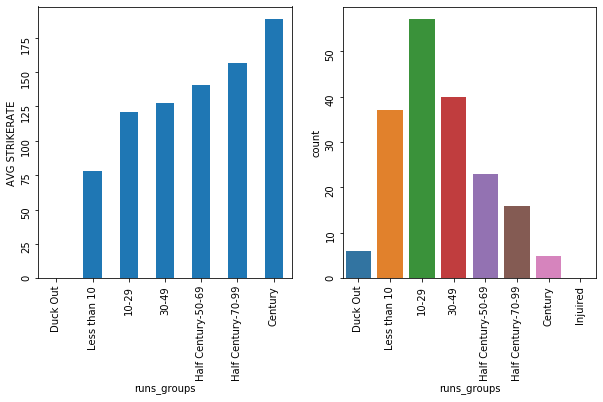

In [26]:
batsman_avgstrikeRate_vs_runsGroups('Virat Kohli')

In [48]:
# bat[bat.fullName == 'Glenn Maxwell'].sample(20)

In [49]:
# # how one got out (out_type: catch,lBW,run out,bowled,not out,st)
# '&dagger;','&amp;'



('&dagger;', '&amp;')

# & is HTML for "Start of a character reference". &amp; is the character reference for "An ampersand". ... I

In [27]:
# bat.shortText = bat.shortText.replace({'&dagger;':'','&amp;':''})
bat.shortText.replace({'&dagger;': '','&amp;':''}).iloc[10720]

'c &dagger;Sangakkara b Malik'

In [28]:
bat.shortText = bat.shortText.apply(lambda x: x.replace('&dagger;',''))
bat.shortText = bat.shortText.apply(lambda x: x.replace('&amp;','&'))

In [32]:
bat.shortText.value_counts()

not out                      2928
 b Malinga                     63
 b Sharma                      48
 b Chawla                      43
 b Kumar                       41
                             ... 
c HH Pandya b Vinay Kumar       1
c Bopara b Pathan               1
lbw b Fernando                  1
run out (Dhoni/Patel)           1
c NK Patel b MM Patel           1
Name: shortText, Length: 4841, dtype: int64

In [33]:
# retired hurt                      11
# absent hurt                        6
# obstructing the field              2

In [34]:
def dismissal_type(x):
    if x[0:5] == 'c & b':
        return 'Catch and bowled'
    elif x[0:2] == 'b ' :
        return 'Bowled'
    elif x[0:2] == 'c ':
        return 'Catch'
    elif x[:3] == 'lbw':
        return 'LBW'
    elif x[:2] == 'st':
        return 'Stump'
    elif x[0:7] == 'not out':
        return 'Not out'
    elif x[0:7] == 'run out':
        return 'Run out'
    elif x[:13] == 'retired hurt':
        return 'retired hurt'
    elif x[:12] == 'absent hurt':
        return 'absent hurt'
    elif x[:10] == 'hit wicket':
        return 'hit wicket '
    elif x[:21] == 'obstructing the field':
        return 'obstructing the field'
    else:
        return 'unknown'

In [35]:
bat.shortText =bat.shortText.apply(lambda x:x.strip())
bat['dismissal_Type'] = bat.shortText.map(dismissal_type)

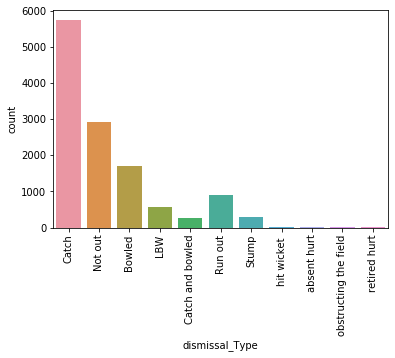

In [37]:
# bat['dismissal_Type'].value_counts().plot(kind='bar')
sns.countplot(bat['dismissal_Type'])
plt.xticks(rotation = 90)
plt.show()

In [38]:
# fun : given a player provide the type of dismmisal

def batsman_dismissal_type(x):
    sns.countplot(bat[bat['fullName']==x]['dismissal_Type'])
    plt.xticks(rotation = 90)
    plt.show()

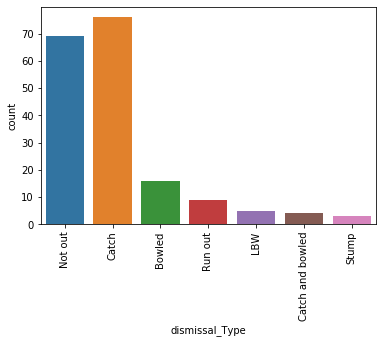

In [39]:
batsman_dismissal_type('MS Dhoni')

# Do Catch type

In [40]:
bat[((bat.dismissal_Type == 'Catch')&(bat.fullName == 'MS Dhoni'))].commentary[12267]

'fuller outside the off stump and slower in pace too as Dhoni chips it to long off , where Kaif is lurking and he does not drop these'

In [41]:
bat[((bat.dismissal_Type == 'Catch')&(bat.fullName == 'MS Dhoni'))].commentary

114      Dhoni walks off. Doesn't wait to see if this l...
384      <b>taken at long-off!</b> Calculative and cons...
434      <b>taken at extra cover.</b> Low full toss acr...
504      Dhoni takes Nortje on, and edges through. Seem...
596      <b>thin edge and he walks.</b> That is a lovel...
                               ...                        
11931    and he has got him! Dhoni's struggle ends, he ...
11965    What a stunning catch from AB. Dhoni had drill...
12237    he doesn't time it this either and he's caught...
12267    fuller outside the off stump and slower in pac...
12350    caught! Dhoni takes a step out of his crease a...
Name: commentary, Length: 76, dtype: object

In [42]:
#23 rd Dec 2020 

In [43]:
# fun : given a player provide the type of dismmisal

def batsman_dismissal_type(x,start_yr = 2008,end_yr=2020):
    if  ((start_yr >= min(bat.season)) & (start_yr <= max(bat.season)) &
         (end_yr >= min(bat.season)) & (end_yr <= max(bat.season)) & (end_yr >= start_yr )):
        sns.countplot(bat[((bat['fullName']==x)&(bat.season >= start_yr)&(bat.season<= end_yr))]['dismissal_Type'])
        plt.xticks(rotation = 90)
        plt.show()
    else:
        print('Ending year should be greater than start year and minimum year and maximum year should be:',min(bat.season),max(bat.season),'respectively')

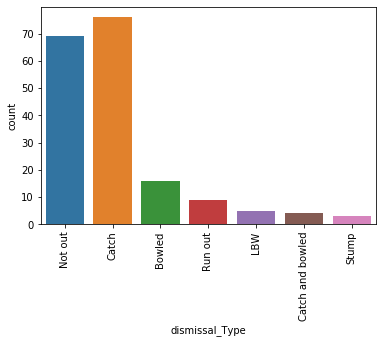

In [44]:
batsman_dismissal_type('MS Dhoni')

In [47]:
bat.venue.unique() # all venue's 

array(['Sheikh Zayed Stadium, Abu Dhabi',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Eden Gardens, Kolkata', 'Wankhede Stadium, Mumbai',
       'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi',
       'M.Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'Maharashtra Cricket Association Stadium, Pune',
       'Holkar Cricket Stadium, Indore',
       'Saurashtra Cricket Association Stadium, Rajkot',
       'Green Park, Kanpur',
       'Shaheed Veer Narayan Singh International Stadium, Raipur',
       'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad',
       'Brabourne Stadium, Mumbai',
       'JSCA International Stadium Complex, Ranchi',
       'Barabati Stadium, Cuttack',
       'H

In [51]:
# stadium wise batsmen stats 

In [52]:
def stadium_wise_good_average(stadium_name,top):
    df = pd.crosstab(bat.venue,bat.fullName)
    df1 = df.T
    #given a stadium top 3 performer
    df2 = df1[df1[stadium_name] >= 10][stadium_name].sort_values(ascending = False)
    if df2.shape[0] !=0:
        stadium_wise_runs = pd.DataFrame(index = df2.index)
        runs_sum = []
        matches = []
        avg_strikeRate =[]
        ball_faced = []
        for i in df2.index:
            runs_sum.append(bat[((bat.venue ==stadium_name )&(bat.fullName == i))].runs.sum())
            matches.append(bat[((bat.venue ==stadium_name )&(bat.fullName == i))].match_id.count())
            avg_strikeRate.append(bat[((bat.venue == stadium_name )&(bat.fullName == i))].strikeRate.mean())
            ball_faced.append(bat[((bat.venue == stadium_name )&(bat.fullName == i))].ballsFaced.sum())
#         stadium_wise_runs['runs'] = runs_sum
        stadium_wise_runs['matches'] = matches
        stadium_wise_runs['Total_balls_faced'] = ball_faced
        stadium_wise_runs['total_runs'] = runs_sum
        stadium_wise_runs['Avg_runs'] = stadium_wise_runs['total_runs']/stadium_wise_runs['matches']
        stadium_wise_runs['Avg_strikeRate'] = avg_strikeRate
        return stadium_wise_runs.sort_values(by=['Avg_runs','matches'],ascending = False)[:top]
    else:
        print('There are no players who have played more than 10 matches in ',stadium_name)

In [53]:
stadium_wise_good_average('Rajiv Gandhi International Stadium, Uppal, Hyderabad',10)

,matches,Total_balls_faced,total_runs,Avg_runs,Avg_strikeRate
fullName,,,,,
David Warner,31,991.0,1602.0,51.677419,148.444839
Shikhar Dhawan,46,1123.0,1378.0,29.956522,115.952174
Rohit Sharma,16,335.0,466.0,29.125000,140.765000
Kane Williamson,18,367.0,508.0,28.222222,125.064444
Yusuf Pathan,15,229.0,351.0,23.400000,123.738667
Manish Pandey,14,300.0,318.0,22.714286,93.526429
Moises Henriques,19,324.0,409.0,21.526316,110.195789
Naman Ojha,18,257.0,343.0,19.055556,110.046111
Dwaraka Ravi Teja,11,161.0,199.0,18.090909,111.280000


In [96]:
bat.head(2)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,runs_groups,boundaries_4,boundaries_6,total_runs_in_boundaries,dismissal_Type
0,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,RG Sharma,Rohit Sharma,12.0,10.0,-,2.0,0.0,120.0,True,False,"{'wickets': 1, 'runs': 46}",4.4,c Curran b Chawla,<b>chipped straight to mid-off!</b> Full on of...,NaN,10-29,8.0,0.0,8.0,Catch
1,2020,1216492,MI v CSK,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,Q de Kock,Quinton de Kock,33.0,20.0,-,5.0,0.0,165.0,False,False,"{'wickets': 2, 'runs': 48}",5.1,c Watson b Curran,<b>straight to midwicket!</b> Slow does it! Sp...,NaN,30-49,20.0,0.0,20.0,Catch


In [54]:
def batsman_season_wise_trend(x):
#     fig,ax=plt.subplots(2,2, figsize=(10,5))
    fig,ax=plt.subplots(2,2, figsize=(10,5))
    df = pd.pivot_table(bat[(bat.fullName == x)],index = 'season',values=['match_id','runs','strikeRate'],aggfunc = ('count','sum','mean'))
    df = df[[(  'match_id', 'count'),(      'runs',  'sum'),('strikeRate', 'mean')]]
    df.columns = ['match_count','runs_sum','avg_strikeRate']
    sns.lineplot(x=df.index, y='match_count', data=df,ax=ax[0][0])
    ax[0][0].set_ylabel('Match count')
    
    sns.lineplot(x=df.index, y='runs_sum', data=df,ax=ax[0][1])
    ax[0][1].set_ylabel('Sum of Runs')
    
    sns.lineplot(x=df.index, y='avg_strikeRate', data=df,ax=ax[1][0])
    ax[1][0].set_ylabel('Avg StrikeRate')
    
    plt.show()

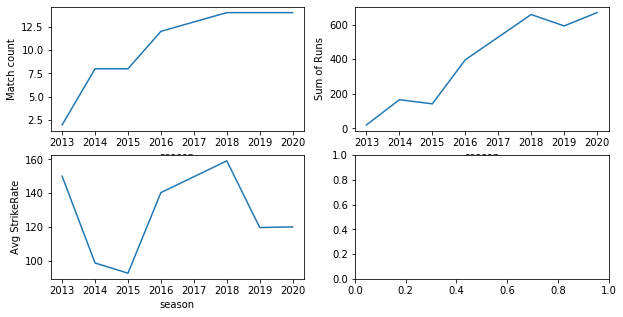

In [55]:
batsman_season_wise_trend('KL Rahul')